In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("social_media_viral_content_dataset.csv")

In [3]:
del_cols = ["views","likes","comments","shares","engagement_rate"]
data = data.drop(columns=del_cols,axis = 1)
data.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,0.223,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   sentiment_score  2000 non-null   float64
 9   is_viral         2000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [5]:
data.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
sentiment_score    0
is_viral           0
dtype: int64

In [6]:
data["post_datetime"] = pd.to_datetime(data["post_datetime"])

In [7]:
data.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10,#tech #funny #music,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13,#news #fyp #funny #ai #trending,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03,#ai #news,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04,#ai #funny,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28,#news #ai #viral #funny #fyp,0.223,1


In [8]:
data["post_datetime"]

0      2024-12-10
1      2024-10-13
2      2024-05-03
3      2024-08-04
4      2024-03-28
          ...    
1995   2024-02-11
1996   2024-02-12
1997   2024-05-01
1998   2024-12-23
1999   2024-11-04
Name: post_datetime, Length: 2000, dtype: datetime64[ns]

In [9]:
data["post_month"] = data["post_datetime"].dt.month
data["post_date"] = data["post_datetime"].dt.day
data["post_day"] = data["post_datetime"].dt.weekday

In [10]:
data.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,is_viral,post_month,post_date,post_day
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10,#tech #funny #music,0.464,1,12,10,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13,#news #fyp #funny #ai #trending,-0.800,1,10,13,6
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03,#ai #news,0.416,0,5,3,4
3,SM_100003,X,text,Politics,ur,US,2024-08-04,#ai #funny,0.877,1,8,4,6
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28,#news #ai #viral #funny #fyp,0.223,1,3,28,3


In [11]:
data["is_weekend"] = data["post_day"].isin([5,6]).astype(int)

In [12]:
data.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,is_viral,post_month,post_date,post_day,is_weekend
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10,#tech #funny #music,0.464,1,12,10,1,0
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13,#news #fyp #funny #ai #trending,-0.800,1,10,13,6,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03,#ai #news,0.416,0,5,3,4,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04,#ai #funny,0.877,1,8,4,6,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28,#news #ai #viral #funny #fyp,0.223,1,3,28,3,0


In [13]:
data["post_day"] =data["post_datetime"].dt.weekday

In [14]:
data.head()
# 1 - tuesday


,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,is_viral,post_month,post_date,post_day,is_weekend
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10,#tech #funny #music,0.464,1,12,10,1,0
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13,#news #fyp #funny #ai #trending,-0.800,1,10,13,6,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03,#ai #news,0.416,0,5,3,4,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04,#ai #funny,0.877,1,8,4,6,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28,#news #ai #viral #funny #fyp,0.223,1,3,28,3,0


In [15]:
data["post_day"] = data["post_day"].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

In [16]:
data.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,is_viral,post_month,post_date,post_day,is_weekend
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10,#tech #funny #music,0.464,1,12,10,Tuesday,0
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13,#news #fyp #funny #ai #trending,-0.800,1,10,13,Sunday,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03,#ai #news,0.416,0,5,3,Friday,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04,#ai #funny,0.877,1,8,4,Sunday,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28,#news #ai #viral #funny #fyp,0.223,1,3,28,Thursday,0


In [17]:
data = data.drop("post_datetime",axis = 1)

In [18]:
data.head()

,post_id,platform,content_type,topic,language,region,hashtags,sentiment_score,is_viral,post_month,post_date,post_day,is_weekend
0,SM_100000,Instagram,text,Sports,ur,UK,#tech #funny #music,0.464,1,12,10,Tuesday,0
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,#news #fyp #funny #ai #trending,-0.800,1,10,13,Sunday,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,#ai #news,0.416,0,5,3,Friday,0
3,SM_100003,X,text,Politics,ur,US,#ai #funny,0.877,1,8,4,Sunday,1
4,SM_100004,YouTube Shorts,text,Education,es,US,#news #ai #viral #funny #fyp,0.223,1,3,28,Thursday,0


In [19]:
data = data.drop("post_id",axis = 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore",drop="first",sparse_output=False)

In [21]:
cat_attr = ["platform","content_type","topic","language","region","post_day"]

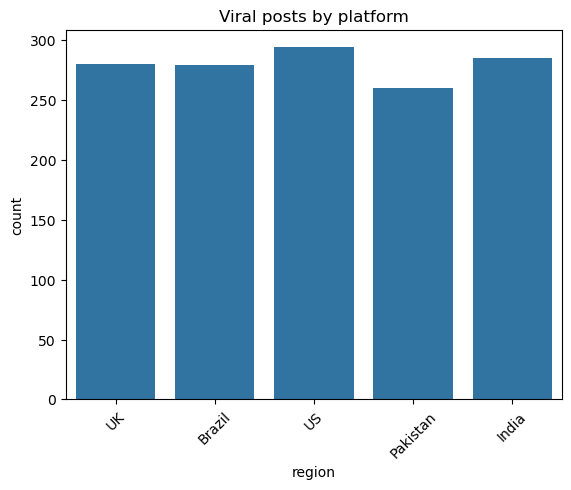

In [22]:
viral_df = data[data["is_viral"] == 1]
plt.figure()
sns.countplot(data=viral_df, x="region")
plt.xticks(rotation=45)
plt.title("Viral posts by platform")
plt.show()


In [23]:
arr = ohe.fit_transform(data[cat_attr])

In [24]:
arr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [25]:
ohe_df = pd.DataFrame(arr,columns=ohe.get_feature_names_out(cat_attr),index=data.index)

In [26]:
ohe_df.head()

,platform_TikTok,platform_X,platform_YouTube Shorts,content_type_image,content_type_text,content_type_video,topic_Entertainment,topic_Lifestyle,topic_Politics,topic_Sports,...,region_India,region_Pakistan,region_UK,region_US,post_day_Monday,post_day_Saturday,post_day_Sunday,post_day_Thursday,post_day_Tuesday,post_day_Wednesday
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
data = pd.concat([data,ohe_df],axis=1)

In [28]:
data.head()

,platform,content_type,topic,language,region,hashtags,sentiment_score,is_viral,post_month,post_date,...,region_India,region_Pakistan,region_UK,region_US,post_day_Monday,post_day_Saturday,post_day_Sunday,post_day_Thursday,post_day_Tuesday,post_day_Wednesday
0,Instagram,text,Sports,ur,UK,#tech #funny #music,0.464,1,12,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Instagram,carousel,Sports,ur,Brazil,#news #fyp #funny #ai #trending,-0.800,1,10,13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,YouTube Shorts,video,Technology,ur,UK,#ai #news,0.416,0,5,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,X,text,Politics,ur,US,#ai #funny,0.877,1,8,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,YouTube Shorts,text,Education,es,US,#news #ai #viral #funny #fyp,0.223,1,3,28,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
data = data.drop(columns=cat_attr,axis=1)

In [30]:
data.head()

,hashtags,sentiment_score,is_viral,post_month,post_date,is_weekend,platform_TikTok,platform_X,platform_YouTube Shorts,content_type_image,...,region_India,region_Pakistan,region_UK,region_US,post_day_Monday,post_day_Saturday,post_day_Sunday,post_day_Thursday,post_day_Tuesday,post_day_Wednesday
0,#tech #funny #music,0.464,1,12,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,#news #fyp #funny #ai #trending,-0.800,1,10,13,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,#ai #news,0.416,0,5,3,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#ai #funny,0.877,1,8,4,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,#news #ai #viral #funny #fyp,0.223,1,3,28,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
data.shape

(2000, 31)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hashtags                 2000 non-null   object 
 1   sentiment_score          2000 non-null   float64
 2   is_viral                 2000 non-null   int64  
 3   post_month               2000 non-null   int32  
 4   post_date                2000 non-null   int32  
 5   is_weekend               2000 non-null   int64  
 6   platform_TikTok          2000 non-null   float64
 7   platform_X               2000 non-null   float64
 8   platform_YouTube Shorts  2000 non-null   float64
 9   content_type_image       2000 non-null   float64
 10  content_type_text        2000 non-null   float64
 11  content_type_video       2000 non-null   float64
 12  topic_Entertainment      2000 non-null   float64
 13  topic_Lifestyle          2000 non-null   float64
 14  topic_Politics          

In [33]:
features = data.drop("is_viral",axis= 1)
labels = data["is_viral"]

In [34]:
labels.shape


(2000,)

In [35]:
train_features,test_features,train_labels,test_labels = train_test_split(
    features,labels,test_size=0.2,random_state=42
)

In [36]:
test_features.shape

(400, 30)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
hashtag_vectorizer = CountVectorizer(
    token_pattern=r"#\w+",
    min_df=5
)

In [39]:
train_features_hash = hashtag_vectorizer.fit_transform(train_features["hashtags"].fillna(""))

In [40]:
test_features_hash =hashtag_vectorizer.transform(test_features["hashtags"].fillna(""))

In [41]:
from scipy.sparse import hstack

In [42]:
train_features = train_features.drop("hashtags",axis=1)
test_features = test_features.drop("hashtags",axis=1)
train_features_final = hstack([train_features,train_features_hash])
test_features_final = hstack([test_features,test_features_hash])

In [43]:
type(train_features_final)

scipy.sparse._coo.coo_matrix

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,recall_score,precision_score

In [69]:
lre = LogisticRegression(max_iter=2000)


nb = GaussianNB()

In [78]:
# Logistic Regression
lre.fit(train_features_final,train_labels)
preds = lre.predict(test_features_final)
f1 = f1_score(test_labels,preds)
recall = recall_score(test_labels,preds)
precison = precision_score(test_labels,preds)

from sklearn.metrics import confusion_matrix
probs = lre.predict_proba(test_features_final)[:, 1]

for t in [0.4, 0.5, 0.6, 0.65, 0.7]:
    preds = (probs > t).astype(int)
    print(
        t,
        f1_score(test_labels, preds),
        precision_score(test_labels, preds),
        recall_score(test_labels, preds)
    )

0.4 0.8183161004431314 0.6925 1.0
0.5 0.8195266272189349 0.6942355889724311 1.0
0.6 0.7956989247311828 0.6925133689839572 0.9350180505415162
0.65 0.751269035532995 0.7070063694267515 0.8014440433212996
0.7 0.6262626262626263 0.7110091743119266 0.5595667870036101


In [68]:
#KNN
ks = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features_final,train_labels)
    preds = knn.predict(test_features_final)
    f1 = f1_score(test_labels,preds)
    recall = recall_score(test_labels,preds)
    precison = precision_score(test_labels,preds)
    print(f"KNN k : {k}  f1 score = {f1},recall score ={recall},precison = {precison}")

KNN k : 3  f1 score = 0.7567567567567568,recall score =0.8086642599277978,precison = 0.7111111111111111
KNN k : 5  f1 score = 0.7754442649434572,recall score =0.8664259927797834,precison = 0.7017543859649122
KNN k : 7  f1 score = 0.7697262479871175,recall score =0.8628158844765343,precison = 0.6947674418604651
KNN k : 9  f1 score = 0.7911392405063291,recall score =0.9025270758122743,precison = 0.704225352112676
KNN k : 11  f1 score = 0.7956318252730109,recall score =0.9205776173285198,precison = 0.7005494505494505
KNN k : 13  f1 score = 0.7981366459627329,recall score =0.927797833935018,precison = 0.7002724795640327
KNN k : 15  f1 score = 0.7987711213517665,recall score =0.9386281588447654,precison = 0.6951871657754011
KNN k : 17  f1 score = 0.8061068702290076,recall score =0.9530685920577617,precison = 0.6984126984126984
KNN k : 19  f1 score = 0.8169440242057489,recall score =0.9747292418772563,precison = 0.703125
KNN k : 21  f1 score = 0.8120300751879699,recall score =0.9747292418772

In [73]:
# Decision tree
depths = [3,5,10,14,18,20] #5
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(train_features_final,train_labels)
    preds = dt.predict(test_features_final)
    f1 = f1_score(test_labels,preds)
    recall = recall_score(test_labels,preds)
    precison = precision_score(test_labels,preds)
    print(f"DT : f1 score = {f1},recall score ={recall},precison = {precison}")

DT : f1 score = 0.7950693374422187,recall score =0.9314079422382672,precison = 0.6935483870967742
DT : f1 score = 0.7987616099071208,recall score =0.9314079422382672,precison = 0.6991869918699187
DT : f1 score = 0.7322970639032815,recall score =0.7653429602888087,precison = 0.7019867549668874
DT : f1 score = 0.6990990990990991,recall score =0.7003610108303249,precison = 0.697841726618705
DT : f1 score = 0.7,recall score =0.7075812274368231,precison = 0.6925795053003534
DT : f1 score = 0.7023172905525846,recall score =0.7111913357400722,precison = 0.6936619718309859


# Verdict - 

In [ ]:
# Logistsic reg giving 0.8195266272189349 as f1 score actually aims to determine if actual post type i.e viral or non viral is predicted